In [42]:
# import the libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator

In [43]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [44]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [45]:
#importing test training dataset
training_set = train_datagen.flow_from_directory(r'C:\Users\Arjun sahas\new_project\Dataset\Dataset\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 416 images belonging to 2 classes.


In [46]:
#importing test Dataset.
test_set = test_datagen.flow_from_directory(r'C:\Users\Arjun sahas\new_project\Dataset\Dataset\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [47]:
#Create Model using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 28, 28, 64)      

In [48]:
#cost and optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [49]:
# fitting the model
cnn = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-49-d5a7b0c36368>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 10s 712ms/step - loss: 1.7186 - accuracy: 0.5962 - val_loss: 0.8292 - val_accuracy: 0.3955
Epoch 2/50
13/13 [==============================] - 9s 684ms/step - loss: 0.4971 - accuracy: 0.7356 - val_loss: 0.9213 - val_accuracy: 0.4552
Epoch 3/50
13/13 [==============================] - 9s 679ms/step - loss: 0.4054 - accuracy: 0.8341 - val_loss: 0.6395 - val_accuracy: 0.5970
Epoch 4/50
13/13 [==============================] - 9s 693ms/step - loss: 0.3484 - accuracy: 0.8462 - val_loss: 0.7333 - val_accuracy: 0.5821
Epoch 5/50
13/13 [==============================] - 9s 702ms/step - loss: 0.2950 - accuracy: 0.8870 - val_loss: 0.6144 - val_accuracy: 0.6418
Epoch 6/50
13/13 [==============================] - 9s 718ms/step - loss: 0.2486 - accuracy: 0.9135 - val_loss: 0.5741 - val_accuracy: 0.7313
Epoch 7/50
13/13 [==============================] - 9s 707ms/step - loss: 0.2281 - accuracy: 0.9111 - val_loss: 0.4890 - val_accuracy: 0.7463
Epoch

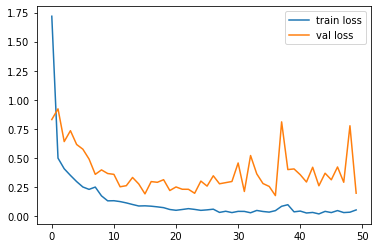

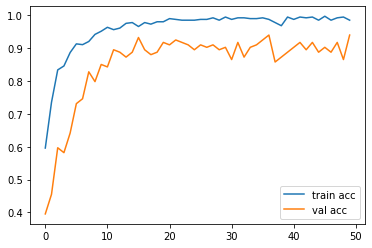

<Figure size 432x288 with 0 Axes>

In [50]:
## Plotting loss and accuracy.
plt.plot(cnn.history['loss'], label='train loss')
plt.plot(cnn.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(cnn.history['accuracy'], label='train acc')
plt.plot(cnn.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [51]:
##saving the keras model.
model.save('malaria.h5')